In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["n/a", "na", "--"]
new_deaths = pd.read_csv("data/new_deaths.csv", na_values=missing_values)
new_cases=pd.read_csv("data/new_cases.csv")
total_deaths=pd.read_csv("data/total_deaths.csv")
total_cases=pd.read_csv("data/total_cases.csv")
full_data=pd.read_csv("data/full_data.csv")

In [3]:
new_cases.head()

date  Worldwide  Afghanistan  Albania  Algeria  Andorra  Argentina  \
0  2020-01-21          0          NaN      NaN      NaN      NaN        NaN   
1  2020-01-22         32          NaN      NaN      NaN      NaN        NaN   
2  2020-01-23        266          NaN      NaN      NaN      NaN        NaN   
3  2020-01-24        262          NaN      NaN      NaN      NaN        NaN   
4  2020-01-25        467          NaN      NaN      NaN      NaN        NaN   

   Armenia  Australia  Austria  ...  Sweden  Switzerland  Thailand  \
0      NaN        NaN      NaN  ...     NaN          NaN       NaN   
1      NaN        NaN      NaN  ...     NaN          NaN       0.0   
2      NaN        NaN      NaN  ...     NaN          NaN       2.0   
3      NaN        NaN      NaN  ...     NaN          NaN       0.0   
4      NaN        NaN      NaN  ...     NaN          NaN       0.0   

   The United Kingdom  Togo  Tunisia  Ukraine  United Arab Emirates  \
0                 NaN   NaN      NaN      NaN                   NaN   
1                 NaN   NaN      NaN      NaN                   NaN   
2                 NaN   NaN      NaN      NaN                   NaN   
3                 NaN   NaN      NaN      NaN                   NaN   
4                 NaN   NaN      NaN      NaN                   NaN   

   United States of America  Viet Nam  
0                       NaN       NaN  
1                       NaN       NaN  
2                       NaN       NaN  
3                       0.0       NaN  
4                       1.0       0.0  

[5 rows x 117 columns]

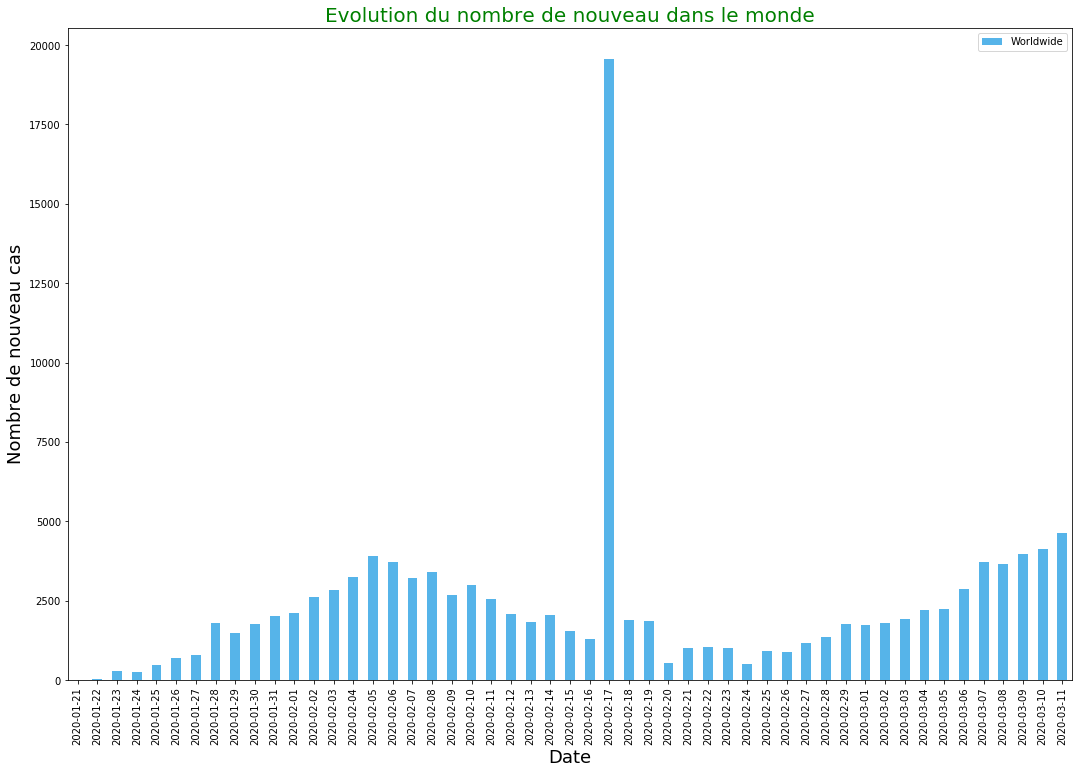

In [4]:
import matplotlib.ticker as mticker

df = pd.DataFrame({'Worldwide':new_cases['Worldwide'],'Date':new_cases['date']})
#df["Date"] = pd.to_datetime(new_cases["date"])

fig, ax = plt.subplots(figsize=(18,12))
df.plot.bar(x='Date', y='Worldwide', ax=ax,color="#56B4E9")

#ticklabels[::skip] = df['Date'].iloc[::skip].dt.strftime('%Y-%m-%d')
#ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
#ax.set_title('Evolution du nombre de nouveau cas dans le monde')
#fig.autofmt_xdate()

plt.ylabel('Nombre de nouveau cas', fontsize=18)
plt.xlabel('Date', fontsize=18)
ax.set_title('Evolution du nombre de nouveau dans le monde', fontsize=20,color='Green')
plt.show()

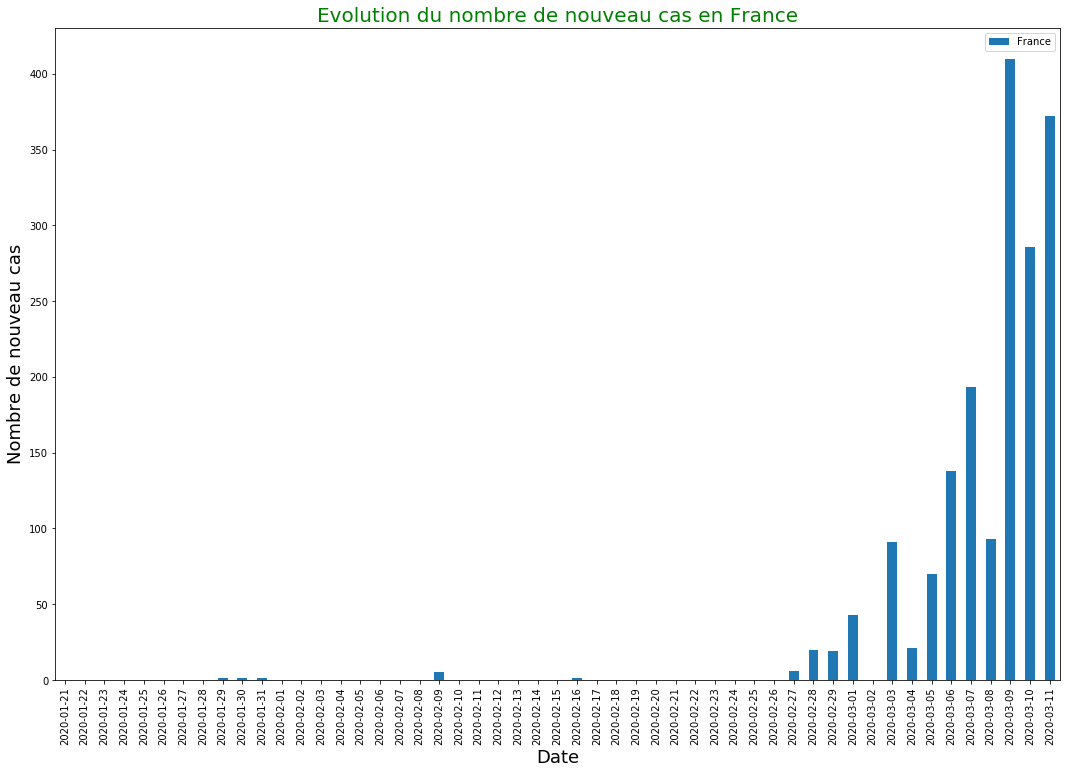

In [5]:
df = pd.DataFrame({'France':new_cases['France'],'Date':new_cases['date']})


fig, ax = plt.subplots(figsize=(18,12))
df.plot.bar(x='Date', y='France', ax=ax)
plt.ylabel('Nombre de nouveau cas', fontsize=18)
plt.xlabel('Date', fontsize=18)
ax.set_title('Evolution du nombre de nouveau cas en France', fontsize=20,color='Green')
plt.show()

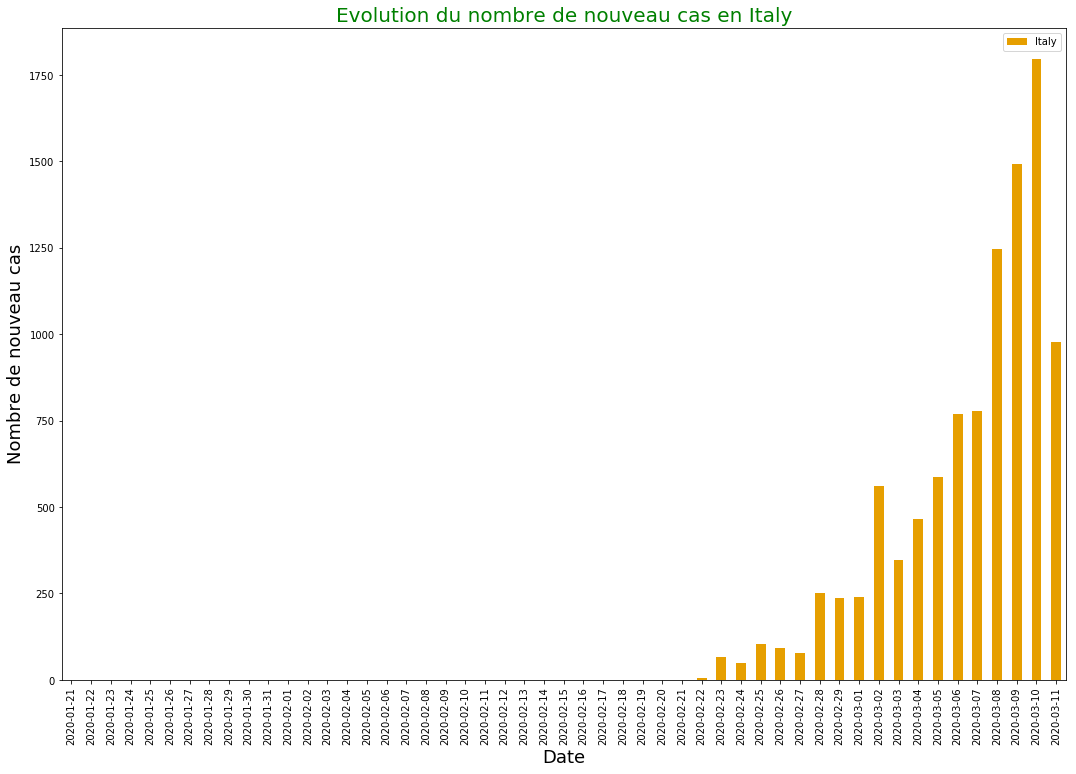

In [6]:
df = pd.DataFrame({'Italy':new_cases['Italy'],'Date':new_cases['date']})


fig, ax = plt.subplots(figsize=(18,12))
df.plot.bar(x='Date', y='Italy', ax=ax,color ="#E69F00")
plt.ylabel('Nombre de nouveau cas', fontsize=18)
plt.xlabel('Date', fontsize=18)
ax.set_title('Evolution du nombre de nouveau cas en Italy', fontsize=20,color='Green')
plt.show()

In [7]:
total_deaths['Worldwide'].sum()

84120

In [8]:
total_deaths['France'].sum()

139.0

In [9]:
total_deaths['Italy'].sum()

2413.0

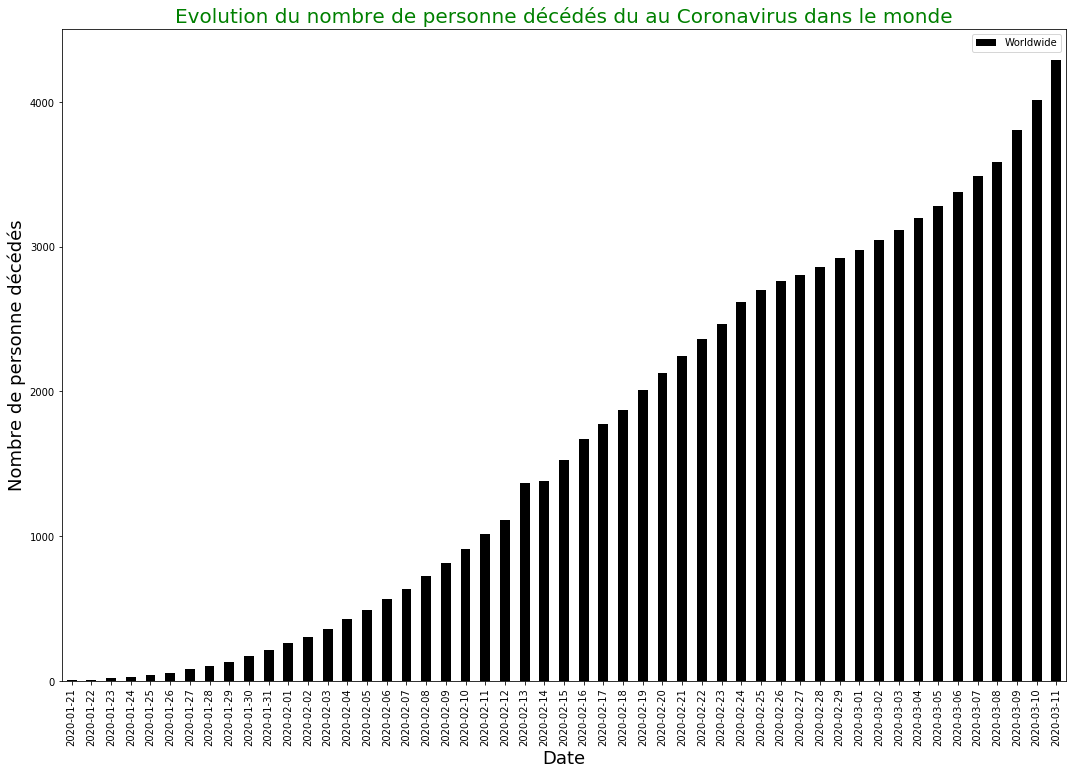

In [10]:
df = pd.DataFrame({'Worldwide':total_deaths['Worldwide'],'Date':total_deaths['date']})


fig, ax = plt.subplots(figsize=(18,12))
df.plot.bar(x='Date', y='Worldwide', ax=ax,color='black')
plt.ylabel('Nombre de personne décédés', fontsize=18)
plt.xlabel('Date', fontsize=18)
ax.set_title('Evolution du nombre de personne décédés du au Coronavirus dans le monde', fontsize=20,color='Green')
plt.show()

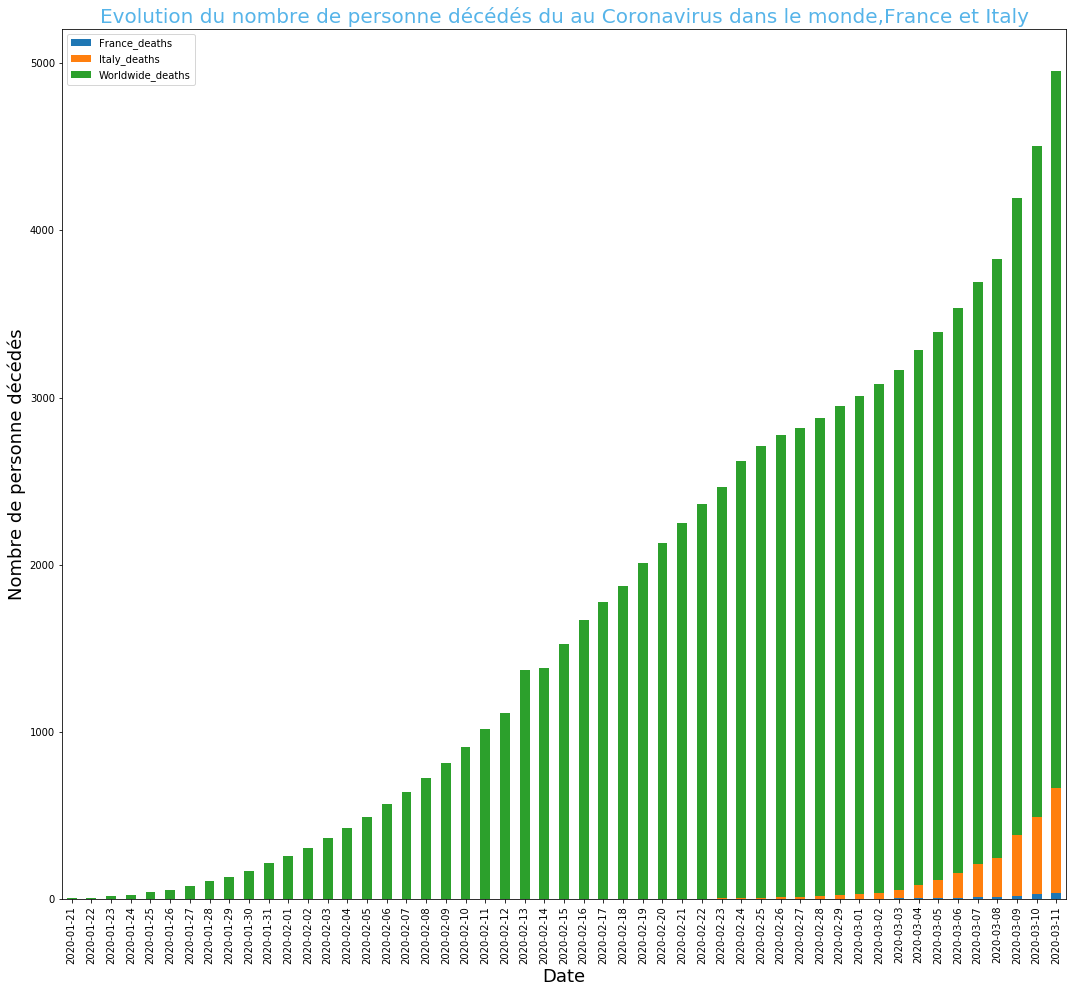

In [11]:
df = pd.DataFrame({'Date':total_deaths['date'],'Worldwide_deaths':total_deaths['Worldwide'],'France_deaths':total_deaths['France'],'Italy_deaths':total_deaths['Italy']})


fig, ax = plt.subplots(figsize=(18,16))
x= df[['Date','France_deaths','Italy_deaths','Worldwide_deaths']]
y= x.set_index('Date')
z=y.groupby('Date').mean()
plt.ylabel('Nombre de personne décédés', fontsize=18)
plt.xlabel('Date', fontsize=18)
ax.set_title('Evolution du nombre de personne décédés du au Coronavirus dans le monde,France et Italy', fontsize=20,color='#56B4E9')
z.plot.bar(ax=ax,stacked=True)

In [13]:
df_death=pd.DataFrame({'Date':total_deaths['date'],'Worldwide_deaths':total_deaths['Worldwide']})
df_cases=pd.DataFrame({'Date':total_cases['date'],'Worldwide_cases':total_cases['Worldwide']})

Total_data= pd.merge(df_death, df_cases, on=['Date'], how='inner')
Total_data['Worldwide_recovered']=Total_data['Worldwide_cases'] - Total_data['Worldwide_deaths']
Total_data.head()

Date  Worldwide_deaths  Worldwide_cases  Worldwide_recovered
0  2020-01-21                 6              282                  276
1  2020-01-22                 6              314                  308
2  2020-01-23                17              581                  564
3  2020-01-24                25              846                  821
4  2020-01-25                41             1320                 1279

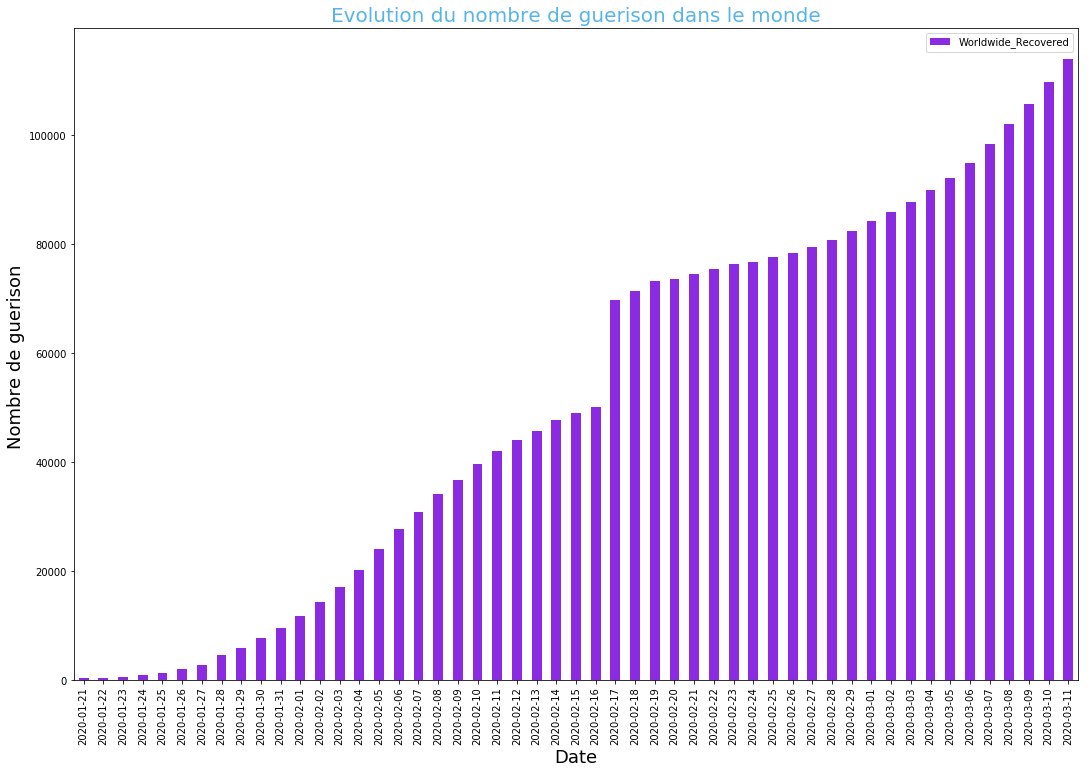

In [14]:
df = pd.DataFrame({'Worldwide_Recovered':Total_data['Worldwide_recovered'],'Date':Total_data['Date']})


fig, ax = plt.subplots(figsize=(18,12))
df.plot.bar(x='Date', y='Worldwide_Recovered', ax=ax,color='blueviolet')
plt.ylabel('Nombre de guerison ', fontsize=18)
plt.xlabel('Date', fontsize=18)
ax.set_title('Evolution du nombre de guerison dans le monde', fontsize=20,color='#56B4E9')
plt.show()